## Running Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.impute import SimpleImputer

In [2]:
# URL for the data
url = 'https://github.com/Redback-Operations/redback-fit-sports-performance/raw/main/Running%20Analysis/activities_cleaned.csv'
##Running Analysis/activities_cleaned.csv

data = pd.read_csv(url)
data.head()

,Activity ID,Activity Type,Begin Timestamp,End Timestamp,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,...,Begin Latitude (Decimal Degrees Raw),Begin Longitude (Decimal Degrees Raw),End Latitude (Decimal Degrees Raw),End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Wind Direction,Humidity (Raw),Condition,Rainfall
0,2284658991,Running,4/11/2017 12:07,4/11/2017 13:06,472.6,472.6,315.0,314.0,182,113,...,48.019178,7.856356,48.019369,7.855831,13.9,11,S,77,fair,no
1,2284658936,Running,3/11/2017 9:47,3/11/2017 10:35,473.2,473.2,245.0,244.0,177,100,...,48.017859,7.881881,48.019410,7.855922,11.1,3,N,100,fair,no
2,2228102647,Running,25/10/2017 16:31,25/10/2017 17:11,278.8,278.8,208.0,272.0,179,95,...,48.018396,7.880602,48.019329,7.855921,20.0,6,SSW,60,fair,no
3,2104984694,Running,13/10/2017 11:53,13/10/2017 12:41,471.6,471.6,246.0,244.0,180,109,...,48.019194,7.856334,48.019312,7.855894,17.2,5,SSO,72,fair,no
4,2084195352,Running,2/10/2017 14:51,2/10/2017 15:38,494.6,494.6,246.0,240.0,174,110,...,48.019116,7.857145,48.019371,7.856066,17.8,19,SW,77,mostly cloudy,no


In [3]:
data.shape

(155, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Activity ID                            155 non-null    int64  
 1   Activity Type                          155 non-null    object 
 2   Begin Timestamp                        155 non-null    object 
 3   End Timestamp                          155 non-null    object 
 4   Max. Elevation (Raw)                   155 non-null    float64
 5   Min. Elevation (Raw)                   155 non-null    float64
 6   Elevation Gain (Raw)                   155 non-null    float64
 7   Elevation Loss (Raw)                   155 non-null    float64
 8   Average Heart Rate (bpm)               155 non-null    int64  
 9   Max. Heart Rate (bpm).1                155 non-null    int64  
 10  Average Moving Speed                   155 non-null    object 
 11  Averag

In [5]:
missing_columns= data.isnull().sum()
missing_columns[missing_columns > 0]

Series([], dtype: int64)

In [6]:
object_columns = data.select_dtypes(include=['object'])
print(object_columns)

    Activity Type   Begin Timestamp     End Timestamp Average Moving Speed  \
0         Running   4/11/2017 12:07   4/11/2017 13:06                 6:47   
1         Running    3/11/2017 9:47   3/11/2017 10:35                 6:18   
2         Running  25/10/2017 16:31  25/10/2017 17:11                 5:52   
3         Running  13/10/2017 11:53  13/10/2017 12:41                 6:11   
4         Running   2/10/2017 14:51   2/10/2017 15:38                 6:01   
..            ...               ...               ...                  ...   
150       Running    9/6/2016 14:56    9/6/2016 15:17                 5:54   
151       Running     7/6/2016 9:10     7/6/2016 9:42                 6:21   
152       Running  28/09/2015 17:19  28/09/2015 17:39                 6:01   
153       Running  24/09/2015 12:55  24/09/2015 13:16                 6:18   
154       Running     1/1/2015 3:34    5/6/2016 12:48                 6:18   

    Average Speed Max. Speed Duration (h:m:s) Moving Duration (

In [7]:
data['Calories'] = data['Calories'].str.replace(',', '').astype(float)

In [8]:
def convert_to_minutes(time_str):
    try:
        parts = time_str.split(':')
        if len(parts) == 2:
            minutes, seconds = map(int, parts)
            return minutes + seconds / 60
        else:
            # Handle cases where the time format is incorrect
            return None  # or np.nan if you prefer
    except ValueError:
        # Handle cases where the conversion to int fails
        return None

In [9]:
data['Average Moving Speed(m/km)']= data['Average Moving Speed'].apply(convert_to_minutes)

In [10]:
data['Average Speed(m/km)']= data['Average Speed'].apply(convert_to_minutes)

In [11]:
data['Max. Speed(m/km)']= data['Max. Speed'].apply(convert_to_minutes)

In [12]:
def convert_to_minutes2(time_str):
    try:
        parts = time_str.split(':')
        if len(parts) == 3:
            hours, minutes, seconds = map(int, parts)
            total_minutes = hours * 60 + minutes + seconds / 60
            return total_minutes
        else:
            # Handle cases where the time format is incorrect
            return None  # or np.nan if you prefer
    except ValueError:
        # Handle cases where the conversion to int fails
        return None

In [13]:
data['Duration (m)']= data['Duration (h:m:s)'].apply(convert_to_minutes2)
data['Moving Duration (m)']= data['Moving Duration (h:m:s)'].apply(convert_to_minutes2)

In [14]:
data = data.drop(['Begin Latitude (Decimal Degrees Raw)', 'Begin Longitude (Decimal Degrees Raw)','End Latitude (Decimal Degrees Raw)','End Longitude (Decimal Degrees Raw)','Average Moving Speed','Average Speed','Max. Speed','Duration (h:m:s)','Moving Duration (h:m:s)'], axis=1)

In [15]:
data.isnull().sum()

Activity ID                   0
Activity Type                 0
Begin Timestamp               0
End Timestamp                 0
Max. Elevation (Raw)          0
Min. Elevation (Raw)          0
Elevation Gain (Raw)          0
Elevation Loss (Raw)          0
Average Heart Rate (bpm)      0
Max. Heart Rate (bpm).1       0
Distance (Raw)                0
Calories                      0
Device                        0
Temperature (Raw)             0
Wind Speed (Raw)              0
Wind Direction                0
Humidity (Raw)                0
Condition                     0
Rainfall                      0
Average Moving Speed(m/km)    0
Average Speed(m/km)           0
Max. Speed(m/km)              0
Duration (m)                  0
Moving Duration (m)           0
dtype: int64

In [16]:
df = data.dropna()
df=df.reset_index(drop=True)

In [17]:
df.shape

(155, 24)

In [18]:
df.describe()

,Activity ID,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,Distance (Raw),Calories,Temperature (Raw),Wind Speed (Raw),Humidity (Raw),Average Moving Speed(m/km),Average Speed(m/km),Max. Speed(m/km),Duration (m),Moving Duration (m)
count,1.550000e+02,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.534023e+09,383.125613,383.125613,158.055097,158.407484,174.148387,96.941935,26.776991,523.625806,18.165806,9.948387,65.322581,5.896237,5.945269,4.323871,39.990108,265.061183
std,2.847469e+08,117.063615,117.063615,119.421463,118.436687,5.275271,9.664662,251.049566,204.477038,6.917693,5.588478,17.519538,0.980682,0.960015,0.523961,17.602145,2800.472785
min,9.083326e+08,159.800000,159.800000,3.000000,3.000000,135.000000,70.000000,2.701190,224.000000,-2.800000,2.000000,26.000000,3.700000,4.800000,0.483333,16.016667,15.733333
25%,1.297725e+09,307.245000,307.245000,70.000000,70.095000,173.000000,95.000000,5.016340,386.500000,14.450000,5.000000,53.000000,5.358333,5.416667,4.133333,27.058333,26.725000
50%,1.449839e+09,326.680000,326.680000,134.500000,132.610000,174.000000,97.000000,6.107940,465.000000,18.900000,10.000000,64.000000,5.833333,5.883333,4.383333,37.816667,37.616667
75%,1.743754e+09,456.705000,456.705000,217.270000,218.110000,176.000000,98.000000,7.773235,626.000000,22.800000,13.000000,77.000000,6.183333,6.233333,4.608333,48.300000,48.291667
max,2.284659e+09,756.600000,756.600000,622.000000,624.000000,192.000000,143.000000,3132.000000,1263.000000,32.800000,27.000000,100.000000,14.183333,14.233333,5.266667,120.183333,34904.933333


In [19]:
d=df.describe(include='all')
d.transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Activity ID,155.0,NaN,NaN,NaN,1534023385.374193,284746883.479481,908332579.0,1297725188.5,1449838811.0,1743753878.0,2284658991.0
Activity Type,155,1,Running,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Begin Timestamp,155,155,4/11/2017 12:07,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End Timestamp,155,155,4/11/2017 13:06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max. Elevation (Raw),155.0,NaN,NaN,NaN,383.125613,117.063615,159.8,307.245,326.68,456.705,756.6
Min. Elevation (Raw),155.0,NaN,NaN,NaN,383.125613,117.063615,159.8,307.245,326.68,456.705,756.6
Elevation Gain (Raw),155.0,NaN,NaN,NaN,158.055097,119.421463,3.0,70.0,134.5,217.27,622.0
Elevation Loss (Raw),155.0,NaN,NaN,NaN,158.407484,118.436687,3.0,70.095,132.61,218.11,624.0
Average Heart Rate (bpm),155.0,NaN,NaN,NaN,174.148387,5.275271,135.0,173.0,174.0,176.0,192.0
Max. Heart Rate (bpm).1,155.0,NaN,NaN,NaN,96.941935,9.664662,70.0,95.0,97.0,98.0,143.0


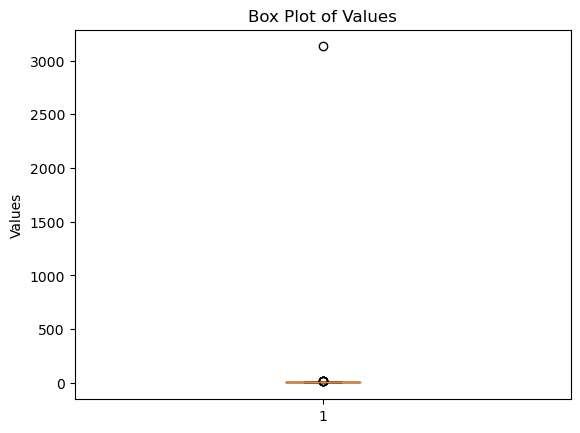

In [20]:
# Plot a box plot
plt.boxplot(df['Distance (Raw)'])
plt.title('Box Plot of Values')
plt.ylabel('Values')
plt.show()

In [21]:
df = df[df['Distance (Raw)'] != 3132]

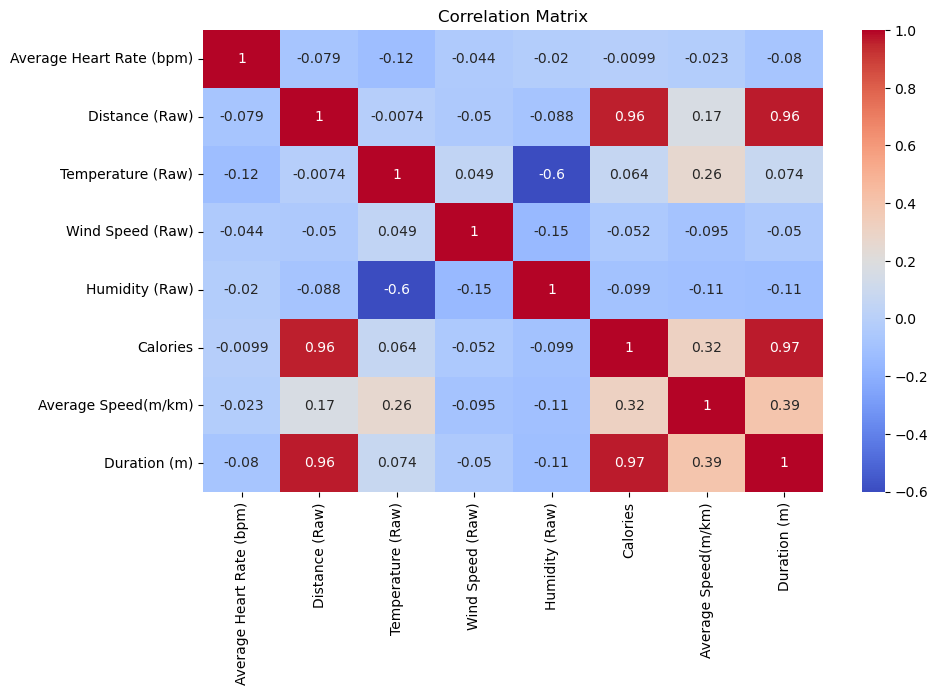

In [22]:
# Correlation Analysis
corr_matrix = df[['Average Heart Rate (bpm)','Distance (Raw)','Temperature (Raw)','Wind Speed (Raw)','Humidity (Raw)','Calories','Average Speed(m/km)','Duration (m)']].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Duration has a strong positive relation with the distance and calories.Average Speed also has a positive effect on the calories and Duration.
Temperature  has a strong negative relation with the humidity.


<AxesSubplot:xlabel='Calories', ylabel='Duration (m)'>

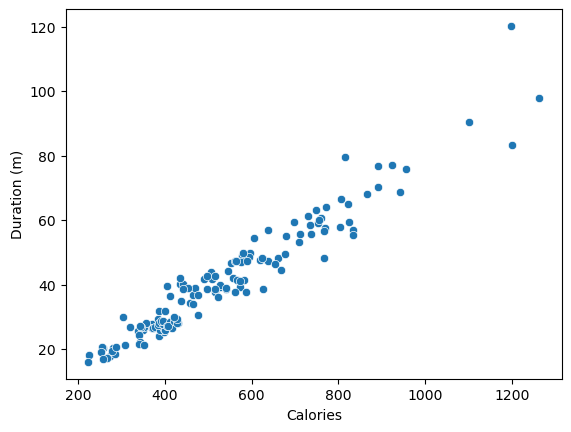

In [23]:
sns.scatterplot(data=df, x='Calories', y='Duration (m)')

<AxesSubplot:xlabel='Calories', ylabel='Average Speed(m/km)'>

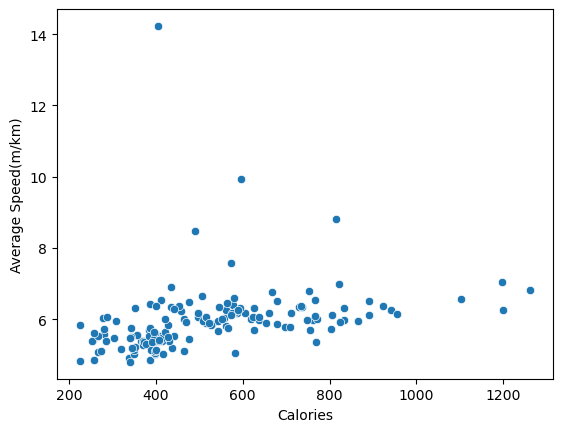

In [24]:
sns.scatterplot(data=df, x='Calories', y='Average Speed(m/km)')

<AxesSubplot:xlabel='Temperature (Raw)', ylabel='Average Speed(m/km)'>

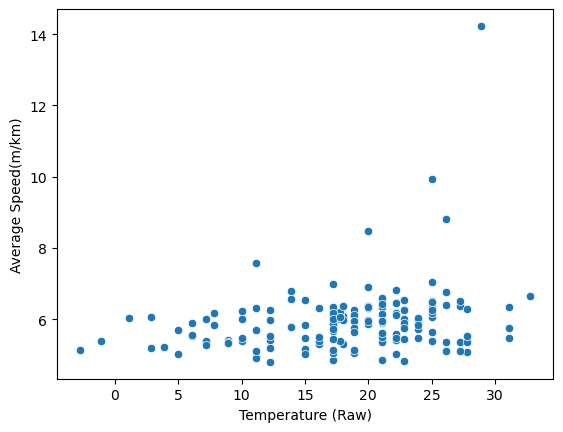

In [25]:
sns.scatterplot(data=df, x='Temperature (Raw)', y='Average Speed(m/km)')

In [26]:
df['Average_pace'] = df['Distance (Raw)'] / df['Duration (m)'] 

<AxesSubplot:xlabel='Average_pace', ylabel='Average Heart Rate (bpm)'>

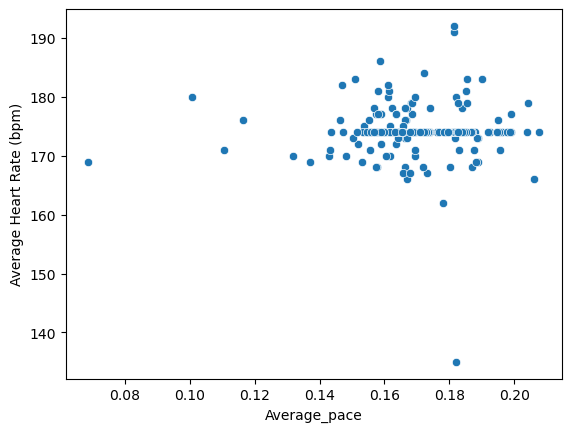

In [27]:
sns.scatterplot(data=df, x='Average_pace', y='Average Heart Rate (bpm)')

## Time Series Plots

In [28]:
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'],  format='%d/%m/%Y %H:%M')
#rundata['Weekday'] = rundata['Activity Date'].dt.weekday

['Average Heart Rate (bpm)','Distance (Raw)','Temperature (Raw)','Wind Speed (Raw)','Humidity (Raw)','Calories','Average Speed(m/km)','Duration (m)']

In [29]:
df['Begin_Timestamp_Month'] = df['Begin Timestamp'].dt.to_period('M')

In [30]:
crosstab= pd.crosstab(df['Begin_Timestamp_Month'],df['Rainfall'])
crosstab['Total'] = crosstab.sum(axis=1)
crosstab_sorted = crosstab.sort_values(by='Begin_Timestamp_Month', ascending=True)
crosstab_sorted

Rainfall,no,yes,Total
Begin_Timestamp_Month,,,
2015-01,1,0,1
2015-09,2,0,2
2016-06,14,1,15
2016-07,14,1,15
2016-08,18,0,18
2016-09,13,0,13
2016-10,8,1,9
2016-11,5,1,6
2016-12,5,2,7


In [31]:
start_date = '2016-05-01'

filtered_df = df[(df['Begin Timestamp'] >= start_date)]

#### Distance

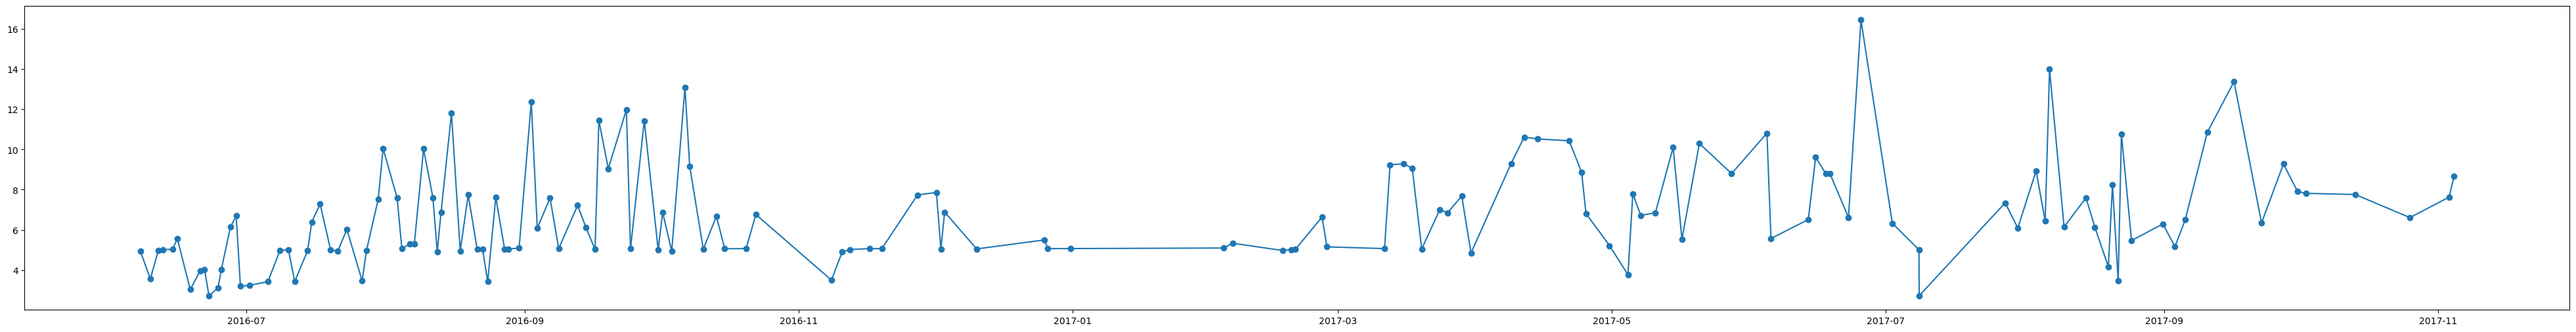

In [32]:
plt.figure(figsize=(50, 6))
plt.plot(filtered_df['Begin Timestamp'], filtered_df['Distance (Raw)'], marker='o')

#### Duration

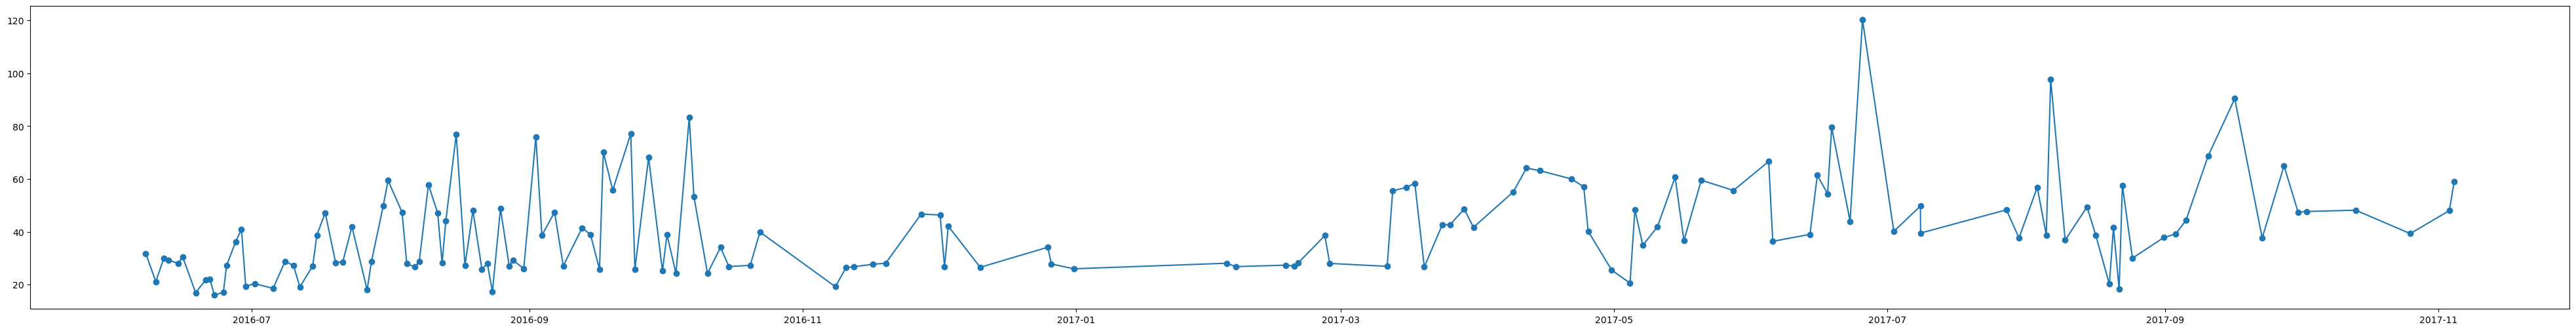

In [33]:
plt.figure(figsize=(50, 6))
plt.plot(filtered_df['Begin Timestamp'], filtered_df['Duration (m)'], marker='o')

#### Calories

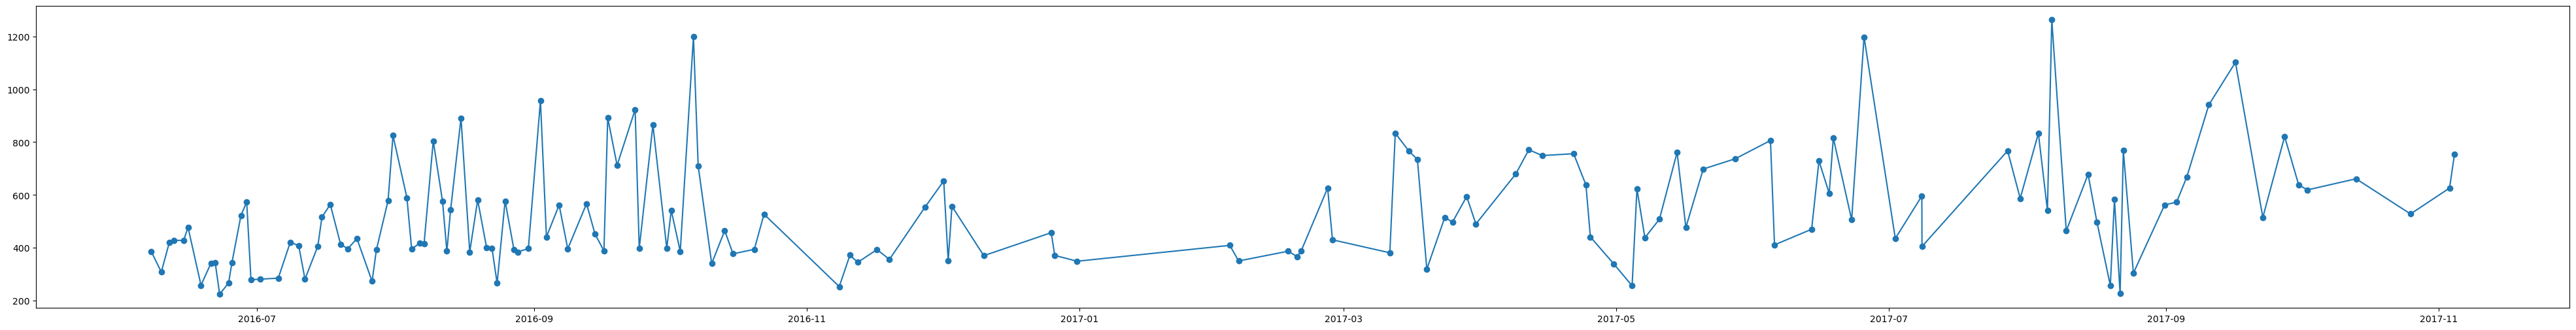

In [34]:
plt.figure(figsize=(50, 6))
plt.plot(filtered_df['Begin Timestamp'], filtered_df['Calories'], marker='o')

#### Average Speed(m/km)

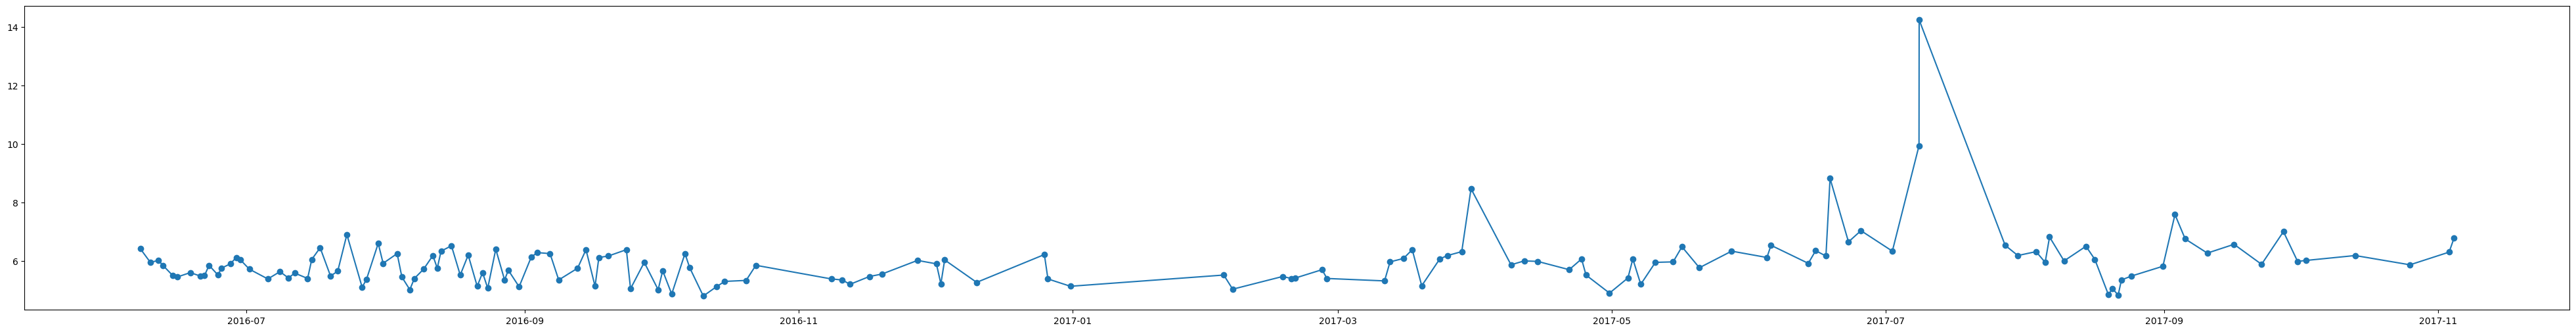

In [35]:
plt.figure(figsize=(50, 6))
plt.plot(filtered_df['Begin Timestamp'], filtered_df['Average Speed(m/km)'], marker='o')

#### Average Heart Rate (bpm)

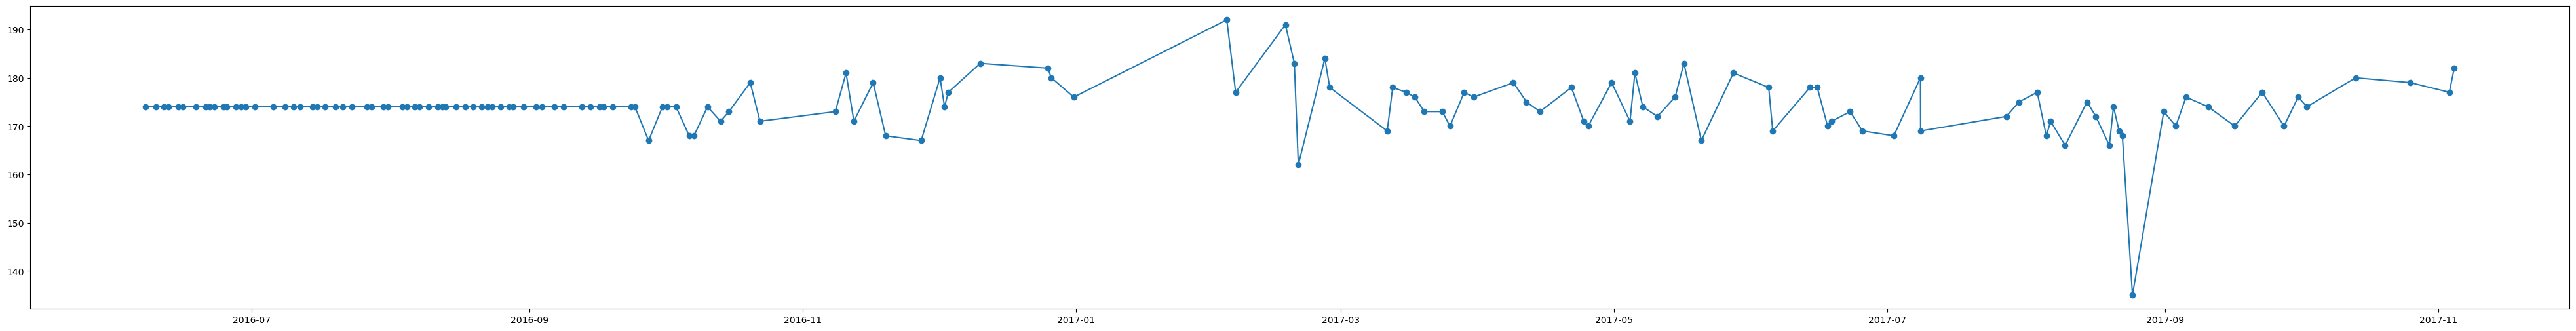

In [36]:
plt.figure(figsize=(50, 6))
plt.plot(filtered_df['Begin Timestamp'], filtered_df['Average Heart Rate (bpm)'], marker='o')

#### Average Pace

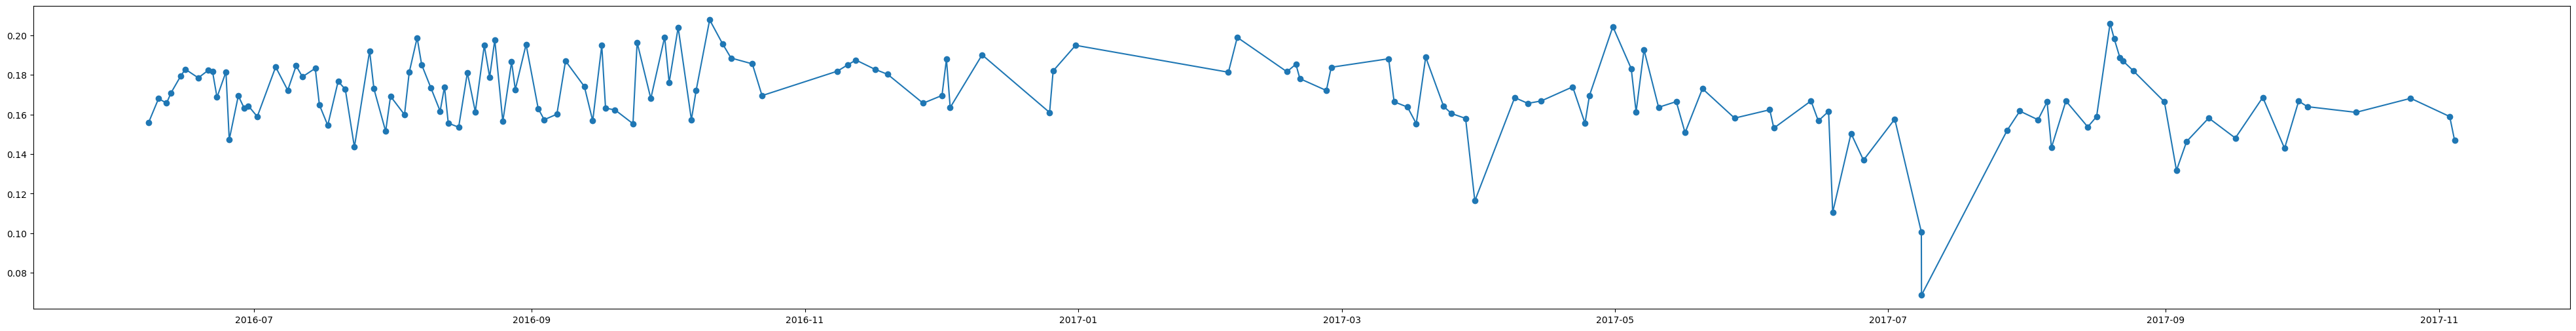

In [37]:
plt.figure(figsize=(50, 6))
plt.plot(filtered_df['Begin Timestamp'], filtered_df['Average_pace'], marker='o')

### ML Models- Linear Regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Split data
X = df[['Average Heart Rate (bpm)','Distance (Raw)','Calories','Duration (m)','Temperature (Raw)','Humidity (Raw)']]  # Features
y = df['Average Speed(m/km)']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [40]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

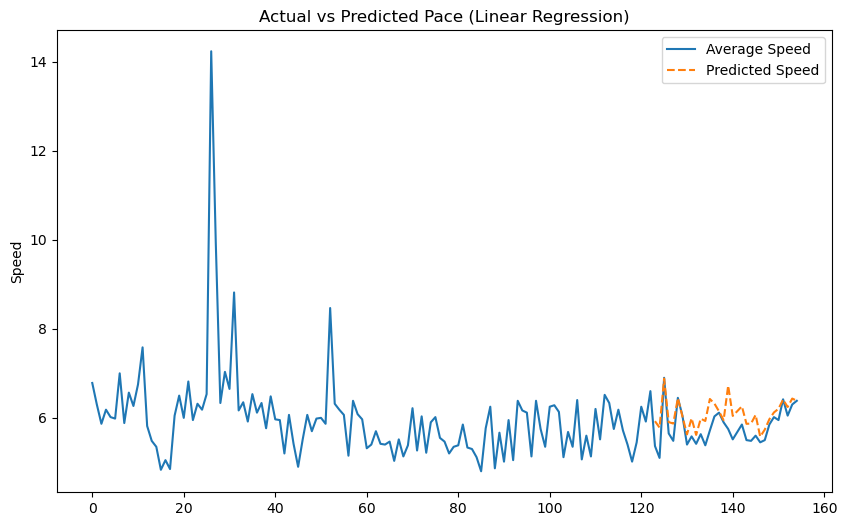

In [41]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Visualize
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average Speed(m/km)'], label='Average Speed')
plt.plot(X_test.index, y_pred, label='Predicted Speed', linestyle='--')
plt.legend()
plt.ylabel('Speed')
plt.title('Actual vs Predicted Pace (Linear Regression)')
plt.show()

In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f"Mean Squared Error (linear Regression): {mse}")
print(f"R2 (linear Regression): {r2_lr}")

Mean Squared Error (linear Regression): 0.14073622451279053
R2 (linear Regression): 0.1014781089458


### Random Forest Regressor

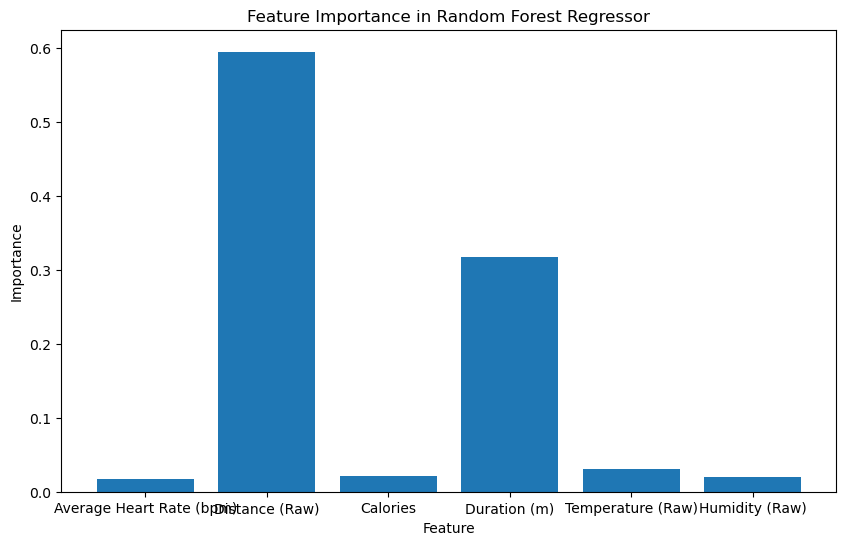

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Feature importance
importances = rf_model.feature_importances_
features_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features_names, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

In [44]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R2 (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 2.0318326200716887
R2 (Random Forest): -11.97211215102977


### KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor

#KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

#fit the model to the training data
knn_model.fit(X_train, y_train)

#predictions on the testing set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f" Mean Squared Error (KNN): {round(knn_mse, 4)}")
print(f" R2 (KNN): {round(knn_r2, 4)}")
     

 Mean Squared Error (KNN): 0.5029
 R2 (KNN): -2.2107


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)

#fit the model to the training data
tree_model.fit(X_train, y_train)

#predictions on the testing set
tree_y_pred = tree_model.predict(X_test)

# Evaluate the model
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)

print(f"Mean Squared Error (Decision Tree): {round(tree_mse, 4)}")
print(f"R2 (Decision Tree): {round(tree_r2, 4)}")

Mean Squared Error (Decision Tree): 4.9107
R2 (Decision Tree): -30.3519


### SVR

In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Support Vector Regression model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R2 (SVR): {r2_svr}")

Mean Squared Error (SVR): 0.2509912721437487
R2 (SVR): 0.5838563962079578


### Comparison 

In [51]:
# Compare the evaluation metrics
metrices = {
    'Model': ['Linear Regression','RandomForestRegressor','KNN','Decision Tree','SVR'],
    'MSE': [mse,mse_rf,knn_mse, tree_mse,mse_svr ],
    'R2': [r2_lr,r2_rf,knn_r2,tree_r2,r2_svr ]
}


metrices_df = pd.DataFrame(metrices)
print(metrices_df)

                   Model       MSE         R2
0      Linear Regression  0.140736   0.101478
1  RandomForestRegressor  2.031833 -11.972112
2                    KNN  0.502894  -2.210698
3          Decision Tree  4.910669 -30.351867
4                    SVR  0.250991   0.583856


According to the above results the linear regression models fits bets for the data.